In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

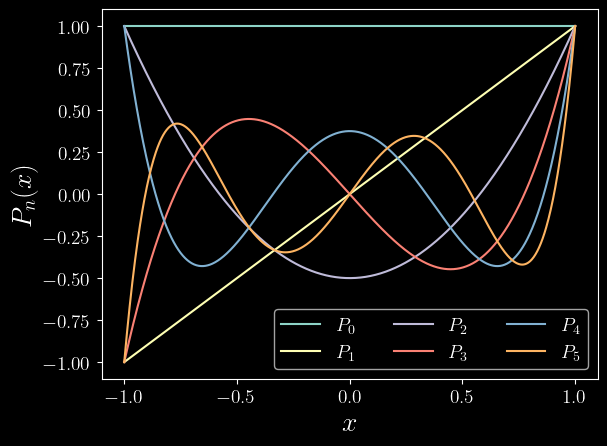

In [3]:
# plot legendre polynomials
xvals = np.linspace(-1, 1, num=1000)
p0 = np.ones_like(xvals)
p1 = xvals
p2 = (3 * xvals**2 - 1) / 2
p3 = (5 * xvals**3 - 3 * xvals) / 2
p4 = (35 * xvals**4 - 30 * xvals**2 + 3) / 8
p5 = (63 * xvals**5 - 70 * xvals**3 + 15 * xvals) / 8

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, p0, label="$P_0$")
ax.plot(xvals, p1, label="$P_1$")
ax.plot(xvals, p2, label="$P_2$")
ax.plot(xvals, p3, label="$P_3$")
ax.plot(xvals, p4, label="$P_4$")
ax.plot(xvals, p5, label="$P_5$")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$P_n(x)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, ncols=3, fontsize=14)

fig.savefig("legendre.pdf", bbox_inches="tight", transparent=True)

In [4]:
def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3, 4 * N - 1, N) / (4 * N + 2)
    x = np.cos(np.pi * a + 1 / (8 * N**2 * np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = np.ones(N, float)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1)
        dp = (N + 1) * (p0 - x * p1)/(1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = np.max(np.abs(dx))

    # Calculate the weights
    w = 2 * (N + 1) * (N + 1) / (N * N * (1 - x * x) * dp**2)

    return x,w

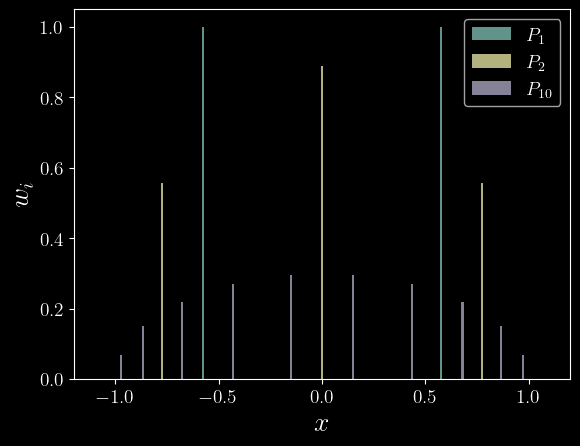

In [5]:
# plot Gaussian quadrature points and weights
x1 = np.asarray([-1 / np.sqrt(3), 1 / np.sqrt(3)])
y1 = np.asarray([1, 1])

x2 = np.asarray([-np.sqrt(3 / 5), 0, np.sqrt(3 / 5)])
y2 = np.asarray([5 / 9, 8 / 9, 5 / 9])

x10, y10 = gaussxw(10)

fig = plt.figure()
ax = plt.gca()

ax.bar(x1, y1, width=0.01, label="$P_1$", alpha=0.7)
ax.bar(x2, y2, width=0.01, label="$P_2$", alpha=0.7)
ax.bar(x10, y10, width=0.01, label="$P_{10}$", alpha=0.7)

ax.set_xlim((-1.2, 1.2))
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$w_i$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)
fig.savefig("xw.pdf", bbox_inches="tight", transparent=True)

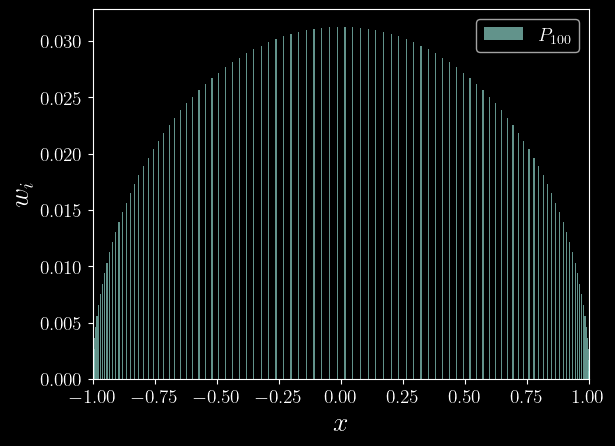

In [6]:
# plot Gaussian quadrature points and weights
x100, y100 = gaussxw(100)

fig = plt.figure()
ax = plt.gca()

ax.bar(x100, y100, width=0.005, label="$P_{100}$", alpha=0.7)

ax.set_xlim((-1, 1))
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$w_i$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)
fig.savefig("xw_100.pdf", bbox_inches="tight", transparent=True)

# Using `scipy.integrate.quad`

In [7]:
# practical example
def f(x):
    return np.exp(-x**2)

# by hand, using N = 3
x3, w3 = gaussxw(3)

y3 = f(x3)
print("x3: ", x3)
print("y3: ", y3)
print("w3: ", w3)

x3:  [ 7.74596669e-01 -8.96888137e-17 -7.74596669e-01]
y3:  [0.54881164 1.         0.54881164]
w3:  [0.55555556 0.88888889 0.55555556]


In [8]:
intval = np.sum(np.dot(y3, w3)) * 2 / np.sqrt(np.pi)
trueval = erf(1.0) - erf(-1.0)
print("integral result: ", intval)
print("comparison with erf: ", trueval)
print("relative error: ", (intval - trueval) / trueval)

integral result:  1.6910788338939036
comparison with erf:  1.6854015858994296
relative error:  0.0033684838331537975


In [9]:
# can also do it with scpiy.integrate.quad
result, error = quad(f, -1, 1)
result *= 2 / np.sqrt(np.pi)
error *= 2 / np.sqrt(np.pi)
print("quad result: ", result)
print("relative error: ", (result - trueval) / trueval)
print("estimated error: ", error)

quad result:  1.6854015858994296
relative error:  0.0
estimated error:  1.8711716464053003e-14


In [10]:
# can even have infinite limits of integration!
result, error = quad(f, -np.inf, np.inf)
print("quad result: ", result)
print("analytic comparison: ", np.sqrt(np.pi))

quad result:  1.7724538509055159
analytic comparison:  1.7724538509055159
